# Consulta de datos con Postgres y Python

In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib as plt

%matplotlib inline

A continuación, configuraremos la conexión a nuestra base de datos de Postgres. Para conectarse, necesitará:

* El nombre de host o la dirección IP donde se encuentra la base de datos
* El puerto que escucha su base de datos (este valor predeterminado es 5439 para Postgres)
* Su nombre de usuario
* La contraseña
* El nombre de la base de datos

In [2]:
from sqlalchemy import create_engine

POSTGRES_ADDRESS = 'localhost' # Este es el servidor, puede ser una IP
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = '1234' 
POSTGRES_DBNAME = 'dvdrental' 

# Ahora se configura la cadena de conexión.
# Esta es una cadena que contiene los parámetros necesarios para establecer una
# conexión con posgres.
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,
                                                                                        password=POSTGRES_PASSWORD,
                                                                                        ipaddress=POSTGRES_ADDRESS,
                                                                                        port=POSTGRES_PORT,
                                                                                        dbname=POSTGRES_DBNAME))
# A continuación se crea la conexión
cnx = create_engine(postgres_str)

A continuación se exploran los pagos realizados por el alquiler de las películas agrupados por id de cliente

In [3]:
# Los primeros 10 registros en la tabla de Pagos
pd.read_sql_query('SELECT * from Payment limit 10', cnx)

payment_id  customer_id  staff_id  rental_id  amount  \
0       17503          341         2       1520    7.99   
1       17504          341         1       1778    1.99   
2       17505          341         1       1849    7.99   
3       17506          341         2       2829    2.99   
4       17507          341         2       3130    7.99   
5       17508          341         1       3382    5.99   
6       17509          342         2       2190    5.99   
7       17510          342         1       2914    5.99   
8       17511          342         1       3081    2.99   
9       17512          343         2       1547    4.99   

                payment_date  
0 2007-02-15 22:25:46.996577  
1 2007-02-16 17:23:14.996577  
2 2007-02-16 22:41:45.996577  
3 2007-02-19 19:39:56.996577  
4 2007-02-20 17:31:48.996577  
5 2007-02-21 12:33:49.996577  
6 2007-02-17 23:58:17.996577  
7 2007-02-20 02:11:44.996577  
8 2007-02-20 13:57:39.996577  
9 2007-02-16 00:10:50.996577

In [4]:
# Los 10 primeros clientes que más han pagado, con la primera y la última fecha de pago
pd.read_sql_query('''
SELECT customer_id, sum(customer_id) as total, 
        min(payment_date) as first_payment, max(payment_date) as last_payment, 
        count(rental_id) as payment_count
FROM Payment 
GROUP BY customer_id 
ORDER BY total desc
LIMIT 10
''', cnx)

customer_id  total              first_payment               last_payment  \
0          526  22092 2007-02-15 04:42:11.996577 2007-04-30 23:07:21.996577   
1          576  18432 2007-02-15 12:49:26.996577 2007-05-14 13:44:29.996577   
2          566  18112 2007-02-16 06:55:22.996577 2007-04-30 21:29:57.996577   
3          595  17255 2007-02-14 22:16:01.996577 2007-04-30 22:25:20.996577   
4          592  17168 2007-02-14 21:41:12.996577 2007-05-14 13:44:29.996577   
5          550  17050 2007-02-15 02:47:03.996577 2007-05-14 13:44:29.996577   
6          459  16983 2007-02-17 01:19:17.996577 2007-04-30 19:42:57.996577   
7          522  16704 2007-02-15 07:12:35.996577 2007-04-30 23:51:41.996577   
8          532  16492 2007-02-16 11:08:49.996577 2007-05-14 13:44:29.996577   
9          469  16415 2007-02-15 14:58:17.996577 2007-04-30 18:27:08.996577   

   payment_count  
0             42  
1             32  
2             32  
3             29  
4             29  
5             31  
6             37  
7             32  
8             31  
9             35

In [5]:
# Los el total de pago por cliente ordenados descendentemente, con la primera y la última fecha de pago
datos = pd.read_sql_query('''
SELECT customer_id, sum(customer_id) as total, 
        min(payment_date) as first_payment, max(payment_date) as last_payment, count(rental_id) as payment_count
FROM Payment 
GROUP BY customer_id 
ORDER BY total desc
''', cnx)

datos

customer_id  total              first_payment               last_payment  \
0            526  22092 2007-02-15 04:42:11.996577 2007-04-30 23:07:21.996577   
1            576  18432 2007-02-15 12:49:26.996577 2007-05-14 13:44:29.996577   
2            566  18112 2007-02-16 06:55:22.996577 2007-04-30 21:29:57.996577   
3            595  17255 2007-02-14 22:16:01.996577 2007-04-30 22:25:20.996577   
4            592  17168 2007-02-14 21:41:12.996577 2007-05-14 13:44:29.996577   
..           ...    ...                        ...                        ...   
594            6    150 2007-02-16 02:10:04.996577 2007-04-28 17:15:49.996577   
595            4     88 2007-02-15 07:59:54.996577 2007-04-30 17:26:26.996577   
596            3     72 2007-02-16 00:02:31.996577 2007-04-30 20:14:12.996577   
597            2     52 2007-02-17 19:23:24.996577 2007-04-30 21:08:19.996577   
598            1     30 2007-02-14 23:22:38.996577 2007-04-30 01:10:44.996577   

     payment_count  
0               42  
1               32  
2               32  
3               29  
4               29  
..             ...  
594             25  
595             22  
596             24  
597             26  
598             30  

[599 rows x 5 columns]

In [6]:
#los primeros 5
datos.head()

customer_id  total              first_payment               last_payment  \
0          526  22092 2007-02-15 04:42:11.996577 2007-04-30 23:07:21.996577   
1          576  18432 2007-02-15 12:49:26.996577 2007-05-14 13:44:29.996577   
2          566  18112 2007-02-16 06:55:22.996577 2007-04-30 21:29:57.996577   
3          595  17255 2007-02-14 22:16:01.996577 2007-04-30 22:25:20.996577   
4          592  17168 2007-02-14 21:41:12.996577 2007-05-14 13:44:29.996577   

   payment_count  
0             42  
1             32  
2             32  
3             29  
4             29

Ahora, veamos cómo se ve la distribución de pagos general en la población de clientes. Usando algunas de las capacidades de visualización integradas en Pandas, podemos generar un histograma simple de los pagos  a través de matplotlib:

<AxesSubplot:>

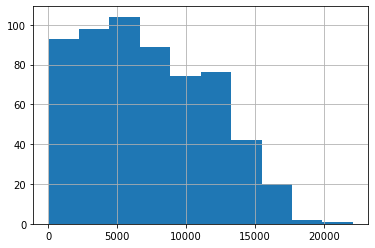

In [7]:
# Nótese que se accede a los atributos de la "tabla", en este caso el dataframe, con el operador punto
datos.total.hist()

Si quisiéramos hacer el gráfico un poco más detallado, podríamos usar bins=250 para aumentar el número de contenedores o de clases, dándonos un gráfico que se ve así:

<AxesSubplot:>

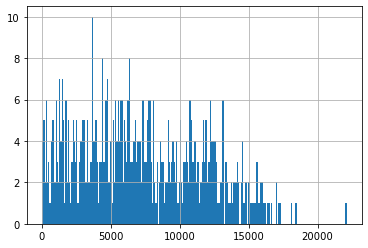

In [8]:
datos.total.hist(bins=250)

A continuación exploremos qué tan relacionados están linealmente el total de dinero pagado vs la cantidad de pagos realizados.

<AxesSubplot:xlabel='total', ylabel='payment_count'>

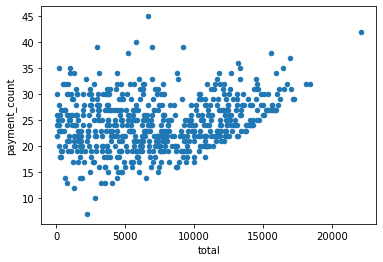

In [9]:
datos.plot.scatter(x='total', y = 'payment_count')